<a href="https://colab.research.google.com/github/Rohanpeerla/Module-4-Lab-2/blob/master/Module_4_Lab_2_FMML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.Change the coefficients array and try a different polynomial instead of our  x2 .

Epoch 1/500, Loss: 2.2007894374011605
Epoch 2/500, Loss: 1.431031405959605
Epoch 3/500, Loss: 0.31287037917994115
Epoch 4/500, Loss: 0.4339615615872067
Epoch 5/500, Loss: 0.18501758011655028
Epoch 6/500, Loss: 0.26938148132145473
Epoch 7/500, Loss: 0.19998425750220847
Epoch 8/500, Loss: 0.23343518756412807
Epoch 9/500, Loss: 0.21167170998261042
Epoch 10/500, Loss: 0.22353488321246437
Epoch 11/500, Loss: 0.21637555823836788
Epoch 12/500, Loss: 0.22044670239575243
Epoch 13/500, Loss: 0.21805052049926196
Epoch 14/500, Loss: 0.21943285534271542
Epoch 15/500, Loss: 0.21862606109491964
Epoch 16/500, Loss: 0.21909376618860565
Epoch 17/500, Loss: 0.2188215653346968
Epoch 18/500, Loss: 0.21897962243092586
Epoch 19/500, Loss: 0.21888772244432364
Epoch 20/500, Loss: 0.2189411151078868
Epoch 21/500, Loss: 0.21891008076292334
Epoch 22/500, Loss: 0.21892811469107148
Epoch 23/500, Loss: 0.21891763366266226
Epoch 24/500, Loss: 0.2189237245310398
Epoch 25/500, Loss: 0.21892018474707114
Epoch 26/500, Lo

Text(0, 0.5, 'Epochs')

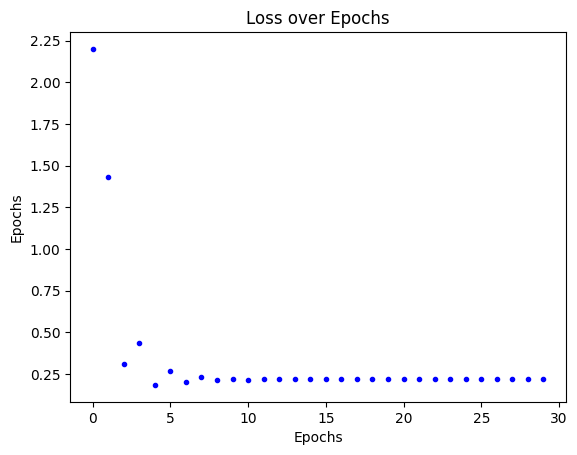

In [5]:
import numpy as np
import matplotlib.pyplot as plt
X = np.linspace(0, 1, 100)
y = 3 * X**2 + 2 * X + 1 + 0.1 * np.random.randn(100)
coefficients = np.random.randn(3)
epochs = 500
learning_rate = 0.01
min_loss_threshold = 0.01
patience = 20
losses = []
for epoch in range(epochs):
    predictions = np.polyval(coefficients, X)
    loss = np.mean((y - predictions)**2)
    gradient = -2 * np.dot(X**2, y - predictions)
    coefficients -= learning_rate * gradient
    print(f"Epoch {epoch+1}/{epochs}, Loss: {loss}")
    losses.append(loss)
    if loss < min_loss_threshold:
        print(f"Training stopped at epoch {epoch+1} as the loss reached the minimum threshold.")
        break
    if epoch > patience and np.all(np.diff(losses)[-patience:] < min_loss_threshold):
        print(f"Training stopped at epoch {epoch+1} due to lack of improvement.")
        break
plt.plot(losses, 'b.')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Epochs')


2.Increase/decrease the learning rate to see how many iterations will be take to coverge. Does it even converge on a huge learning rate?

Training with lr=0.001 stopped at epoch 22 due to lack of improvement.
Training with lr=0.01 stopped at epoch 32 due to lack of improvement.


/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:180: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
<ipython-input-6-c7ddb7f5814e>:16: RuntimeWarning: overflow encountered in square
  loss = np.mean((y - predictions)**2)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:1447: RuntimeWarning: invalid value encountered in subtract
  a = op(a[slice1], a[slice2])
/usr/local/lib/python3.10/dist-packages/numpy/lib/polynomial.py:779: RuntimeWarning: invalid value encountered in multiply
  y = y * x + pv


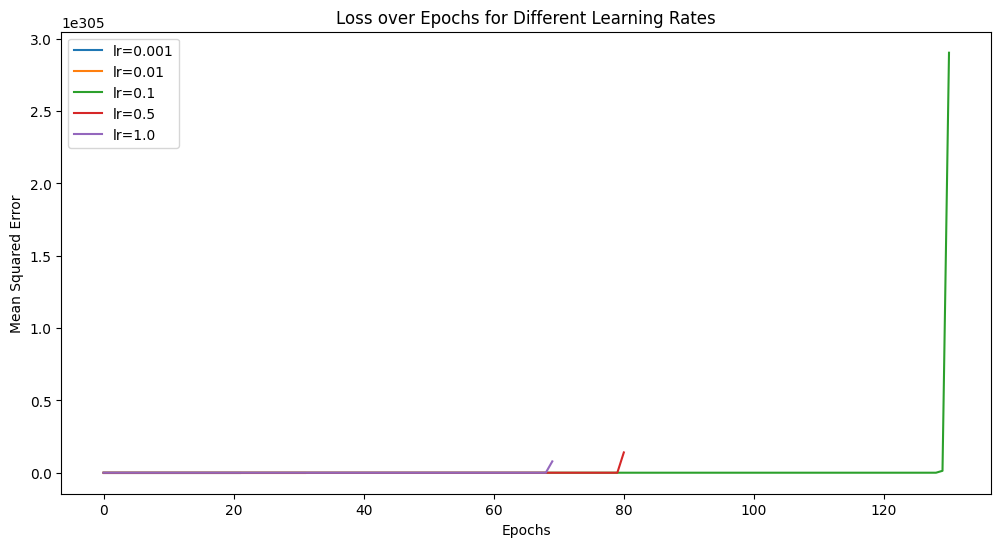

In [6]:
import numpy as np
import matplotlib.pyplot as plt
X = np.linspace(0, 1, 100)
y = 3 * X**2 + 2 * X + 1 + 0.1 * np.random.randn(100)
coefficients = np.random.randn(3)
epochs = 500
learning_rates = [0.001, 0.01, 0.1, 0.5, 1.0]
min_loss_threshold = 0.01
patience = 20
plt.figure(figsize=(12, 6))
for lr in learning_rates:
    coefficients = np.random.randn(3)
    losses = []
    for epoch in range(epochs):
        predictions = np.polyval(coefficients, X)
        loss = np.mean((y - predictions)**2)
        gradient = -2 * np.dot(X**2, y - predictions)
        coefficients -= lr * gradient
        losses.append(loss)
        if loss < min_loss_threshold:
            print(f"Training with lr={lr} stopped at epoch {epoch+1} as the loss reached the minimum threshold.")
            break
        if epoch > patience and np.all(np.diff(losses)[-patience:] < min_loss_threshold):
            print(f"Training with lr={lr} stopped at epoch {epoch+1} due to lack of improvement.")
            break
    plt.plot(losses, label=f'lr={lr}')

plt.title('Loss over Epochs for Different Learning Rates')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()


3.Take a degree 5 polynomial with 5 roots and try different initializations, instead of random ones. Does it converge on different values for different initializations? Why does initialization not matter in our case of  x2 ?

Training with initialization [-1.54784633e-01  1.95928343e+00 -1.93310982e-03 -1.28841371e+00
  1.00088455e+00  2.43417587e+00] stopped at epoch 24 due to lack of improvement.
Training with initialization [ 0.58458151 -0.28076112 -1.97589811  1.36922083  1.30835285  1.14775756] stopped at epoch 26 due to lack of improvement.
Training with initialization [0.41242407 0.14997941 0.42898453 1.04870116 0.40156995 0.14286642] stopped at epoch 29 due to lack of improvement.
Training with initialization [0.83117163 0.04806549 0.58985297 0.06071401 0.11925738 0.8182127 ] stopped at epoch 27 due to lack of improvement.
Training with initialization [ 0.36798306  1.04960045 -1.44755641 -1.19168118 -0.84327992 -0.12478841] stopped at epoch 29 due to lack of improvement.


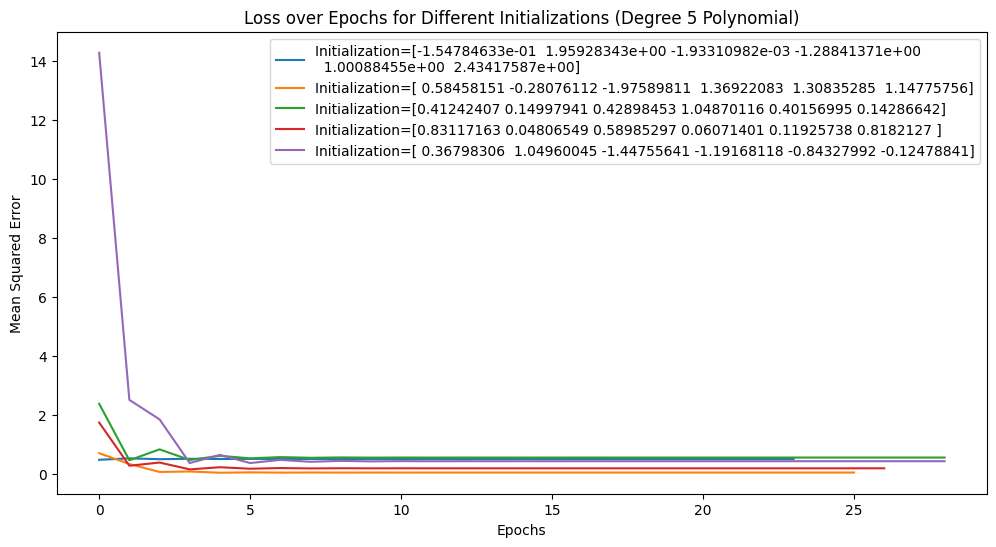

In [7]:
import numpy as np
import matplotlib.pyplot as plt
X = np.linspace(0, 1, 100)
y = 2 * X**5 - 10 * X**4 + 15 * X**3 - 8 * X**2 + 4 * X + 1 + 0.1 * np.random.randn(100)
initializations = [np.random.randn(6) for _ in range(5)]
epochs = 500
learning_rate = 0.01
min_loss_threshold = 0.01
patience = 20
plt.figure(figsize=(12, 6))
for init_coeffs in initializations:
    coefficients = init_coeffs.copy()
    losses = []
    for epoch in range(epochs):
        predictions = np.polyval(coefficients, X)
        loss = np.mean((y - predictions)**2)
        gradient = -2 * np.dot(X**5, y - predictions)
        coefficients -= learning_rate * gradient
        losses.append(loss)
        if loss < min_loss_threshold:
            print(f"Training with initialization {init_coeffs} stopped at epoch {epoch+1} as the loss reached the minimum threshold.")
            break
        if epoch > patience and np.all(np.diff(losses)[-patience:] < min_loss_threshold):
            print(f"Training with initialization {init_coeffs} stopped at epoch {epoch+1} due to lack of improvement.")
            break
    plt.plot(losses, label=f'Initialization={init_coeffs}')

plt.title('Loss over Epochs for Different Initializations (Degree 5 Polynomial)')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()


4.Can you modify the algorithm to find a maxima of a function, instead of a minima?

Training with initialization [ 0.59468406  1.59046499 -0.42183638  0.57069752  0.89057451  1.17130065] stopped at epoch 1 as the loss reached the maximum threshold.
Training with initialization [-0.04499013  1.65202933  0.91839348  1.24185008 -1.40454414  0.78256954] stopped at epoch 1 as the loss reached the maximum threshold.
Training with initialization [-0.00292445 -1.22978367  0.36307767  0.57087199 -0.3625166   0.77588345] stopped at epoch 1 as the loss reached the maximum threshold.
Training with initialization [ 0.19719659 -0.80667492  0.84518479 -0.04591219  0.06857226  0.63552377] stopped at epoch 1 as the loss reached the maximum threshold.
Training with initialization [-0.00436577  1.04257164 -0.93376069  0.47865264  0.08212718  2.0462152 ] stopped at epoch 1 as the loss reached the maximum threshold.


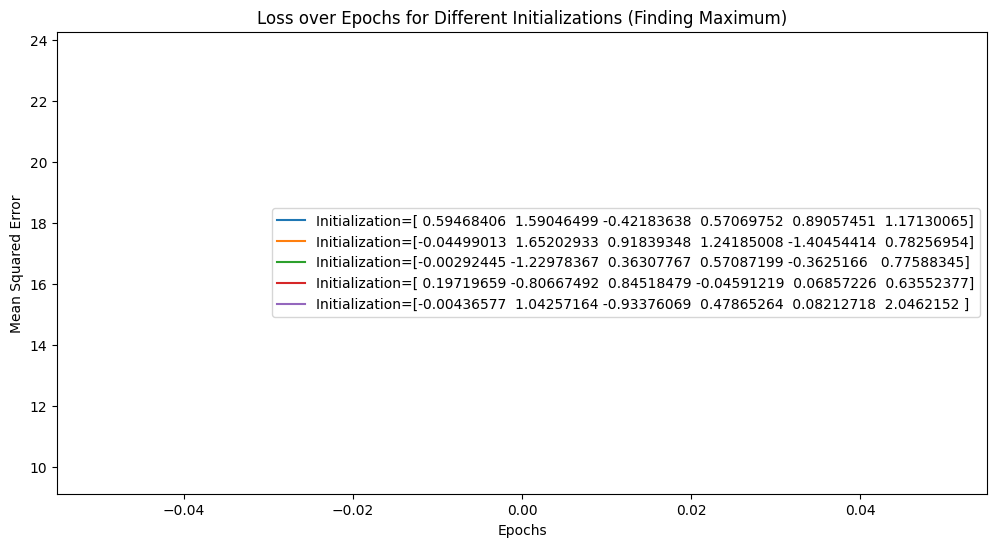

In [21]:
import numpy as np
import matplotlib.pyplot as plt
X = np.linspace(0, 1, 100)
y = -2 * X**5 + 10 * X**4 - 15 * X**3 + 8 * X**2 - 4 * X - 1 + 0.1 * np.random.randn(100)
initializations = [np.random.randn(6) for _ in range(5)]
epochs = 500
learning_rate = 0.01
max_loss_threshold = -0.01
patience = 20
plt.figure(figsize=(12, 6))
for init_coeffs in initializations:
    coefficients = init_coeffs.copy()
    losses = []
    for epoch in range(epochs):
        predictions = np.polyval(coefficients, X)
        loss = np.mean((y - predictions)**2)
        gradient = -2 * np.dot(X**5, y - predictions)
        coefficients += learning_rate * gradient
        losses.append(loss)
        if loss > max_loss_threshold:
            print(f"Training with initialization {init_coeffs} stopped at epoch {epoch+1} as the loss reached the maximum threshold.")
            break
        if epoch > patience and np.all(np.diff(losses)[-patience:] > max_loss_threshold):
            print(f"Training with initialization {init_coeffs} stopped at epoch {epoch+1} due to lack of improvement.")
            break
    plt.plot(losses, label=f'Initialization={init_coeffs}')

plt.title('Loss over Epochs for Different Initializations (Finding Maximum)')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

